# New patient!

## RayStationClinical Goals

Idx | Name | Description | Type | GoalCriteria | AcceptanceLevel | ParameterValue 
-|-|-|-|-|-|-
0 | PTV | **At least 99 % volume at 6270 cGy dose** | VolumeAtDose | AtLeast | 0.99 | 6270
1 | Lungs | At most 2000 cGy average dose | AverageDose | AtMost | 2000 | 0
2 | Lungs | **At most 35 % volume at 2000 cGy dose** | VolumeAtDose | AtMost | 0.35 | 2000
3 | Lungs | At most 50 % volume at 1000 cGy dose | VolumeAtDose | AtMost | 0.5 | 1000
4 | Lungs | At most 65 % volume at 500 cGy dose | VolumeAtDose | AtMost | 0.65 | 500
5 | SpinalCord | **At most 5000 cGy dose at 0.04 cm$^3$ volume** | DoseAtAbsoluteVolume | AtMost | 5000 | 0.035
6 | Esophagus | **At most 6930 cGy dose at 0.04 cm$^3$ volume** | DoseAtAbsoluteVolume | AtMost | 6930 | 0.035
7 | Esophagus | At most 3400 cGy average dose | AverageDose | AtMost | 3400 | 0
8 | Heart | **At most 3500 cGy average dose** | AverageDose | AtMost | 3500 | 0
9 | Heart | At most 70 % volume at 4000 cGy dose | VolumeAtDose | AtMost | 0.7 | 4000
10 | Heart | At most 30 % volume at 6000 cGy dose | VolumeAtDose | AtMost | 0.3 | 6000


## Objective Terms

Idx | Name | Description | FunctionType | DoseLevel | PercentVolume | Weight
-|-|-|-|-|-|-
0 | PTV | Min Dose 6270 cGy | MinDose | 6270 | 0 | 1
1 | PTV | Max Dose 7550 cGy | MaxDose | 7550 | 0 | 1
2 | Lungs | Max DVH 2000 cGy to 35% volume | MaxDvh | 2000 | 35 | 1
3 | SpinalCord | Max Dose 5000 cGy dose | MaxDose | 5000 | 0 | 1
4 | Esophagus | Max Dose 6930 cGy | MaxDose | 6930 | 0 | 1
5 | Heart | Max EUD 3500 cGy | MaxEud | 3500 | 1* | 1

*EudParameterA not PercentVolume

Approved plan PTV objectives
* Min
* Uniform
* Max

Approved plan PTV results
* Max 7300.67 (7405.79 normalized)
* D99 6181 (6270 normalized)
* D95 6438 (6530.70 normalized

## Method:
* Normalize all plans (including approved) to PTV D99 = 6270 cGy
* Try half and quarter parameter values

In [11]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels
import utils

In [53]:
fun_approved = -29.050997956709995 # -35.72756296347541 (not normalized)
stats_approved = np.load('6_16_approved/stats.npy', allow_pickle=True).item()
dvh_approved = np.load('6_16_approved/dvh.npy', allow_pickle=True).item()
objs_approved = np.load('6_16_approved/objs.npy', allow_pickle=True).item()

In [21]:
colors = cm.tab10.colors
roi_list = ['PTV 4/7/20', 'Lungs', 'SpinalCord (Thorax)', 'Esophagus', 'Heart']

In [14]:
def plot_opt(func_vals):
    idx = np.argmin(func_vals)
    plt.plot(func_vals)
    plt.plot(idx, func_vals[idx], '.')
    plt.xlabel('Iteration')
    plt.ylabel('Plan Score')
    plt.legend(['Iterates', 'Best Plan'], bbox_to_anchor=(1, 1));

In [15]:
def plot_pars(x_iters):
    par_list = []
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for ii in range(len(roi_list)):
        par_list.append(x_iters[:, ii])
        ax[1].plot(x_iters[:, ii])
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Parameter Value')
    plt.legend(roi_list, bbox_to_anchor=(1, 1))
    ax[0].boxplot(par_list)
    ax[0].set_xticklabels(roi_list, rotation=90)
    ax[0].set_ylabel('Parameter Value');

In [16]:
def plot_dvh(dvh):
    idx = 0
    handle_list = []
    for roi in roi_list:
        handle, = plt.plot(dvh_approved['Dose'], 100*dvh_approved[roi], color=colors[idx])
        plt.plot(dvh['Dose'], 100*dvh[roi], '--', color=colors[idx])
        handle_list.append(handle)
        idx += 1
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.legend(handles=handle_list, labels=roi_list, bbox_to_anchor=(1, 1));

In [17]:
def get_stats(fun, objs):
    print(f'Approved Score: {fun_approved:.4f}, Result Score: {fun:4f}, % Change: {100*(fun_approved - fun)/fun_approved:.4f}')
    for roi in roi_list:
        app = objs_approved[roi][-1]['ResultValue']
        res = objs[roi][-1]['ResultValue']
        print(f'{roi} Approved: {app:.4f}, Result: {res:.4f}, % Change: {100*(res - app)/app:.4f}')

# Half Range

In [18]:
fun_half = np.load('6_16_half/fun.npy')
func_vals_half = np.load('6_16_half/func_vals.npy')
x_half = np.load('6_16_half/x.npy')
x_iters_half = np.load('6_16_half/x_iters.npy')
stats_half = np.load('6_16_half/stats.npy', allow_pickle=True).item()
dvh_half = np.load('6_16_half/dvh.npy', allow_pickle=True).item()
objs_half = np.load('6_16_half/objs.npy', allow_pickle=True).item()

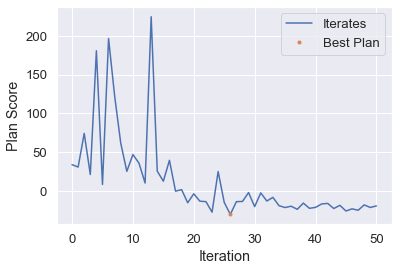

In [19]:
# Optimization
plot_opt(func_vals_half)

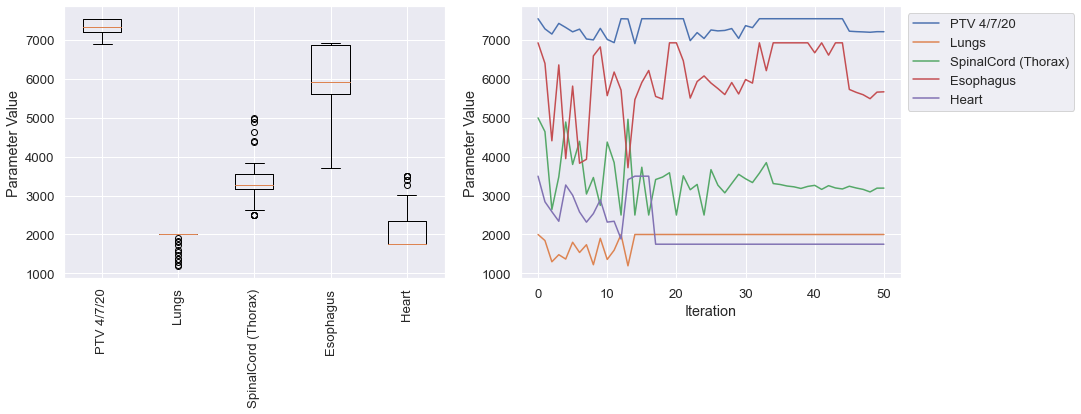

In [22]:
# Parameters
plot_pars(x_iters_half)

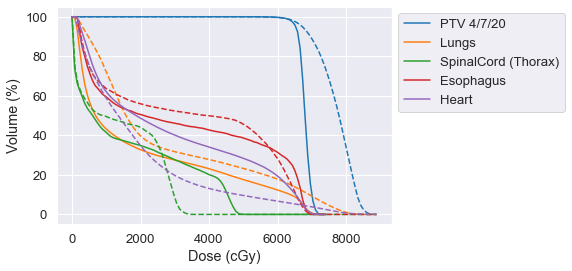

In [57]:
# DVH
plot_dvh(dvh_half)

In [58]:
# Stats
get_stats(fun_half, objs_half)

# Different tradeoff that prioritized the wrong things
# * Improved for SpinalCord and Heart, but worse for PTV and Lungs
# * Slightly better score, but not better plan... need better score function!

# Things to try:
# * Lower parameter range
# * Different score functions for important organs

Approved Score: -29.0510, Result Score: -29.792873, % Change: -2.5537
PTV 4/7/20 Approved: 7405.6592, Result: 8883.9258, % Change: 19.9613
Lungs Approved: 1711.2751, Result: 2410.3350, % Change: 40.8502
SpinalCord (Thorax) Approved: 5225.1553, Result: 3624.8447, % Change: -30.6270
Esophagus Approved: 7064.1133, Result: 7221.8857, % Change: 2.2334
Heart Approved: 2830.0539, Result: 1935.9787, % Change: -31.5922


In [59]:
# Half paramter range
for roi in roi_list:
    dose = objs_half[roi][-1]['DoseValue']
    res = objs_half[roi][-1]['ResultValue']
    print(f'{roi} Absolute Change: {res - dose}, Relative Change: {100*(res - dose)/dose}')

PTV 4/7/20 Absolute Change: 1333.92578125, Relative Change: 17.667891142384107
Lungs Absolute Change: 410.33496285103683, Relative Change: 20.51674814255184
SpinalCord (Thorax) Absolute Change: -1375.1552734375, Relative Change: -27.50310546875
Esophagus Absolute Change: 291.8857421875, Relative Change: 4.211915471681096
Heart Absolute Change: -1564.0212680974548, Relative Change: -44.686321945641566


In [60]:
# Approved plan
for roi in roi_list:
    dose = objs_approved[roi][-1]['DoseValue']
    res = objs_approved[roi][-1]['ResultValue']
    print(f'{roi} Absolute Change: {res - dose}, Relative Change: {100*(res - dose)/dose}')

PTV 4/7/20 Absolute Change: -144.3408203125, Relative Change: -1.9117989445364238
Lungs Absolute Change: -288.72485502598306, Relative Change: -14.436242751299153
SpinalCord (Thorax) Absolute Change: 225.1552734375, Relative Change: 4.50310546875
Esophagus Absolute Change: 134.11328125, Relative Change: 1.9352565836940836
Heart Absolute Change: -669.9461409661476, Relative Change: -19.141318313318504


# Quarter Range (0-50)

In [78]:
fun_quarter0 = np.load('6_16_quarter/first/fun.npy')
func_vals_quarter0 = np.load('6_16_quarter/first/func_vals.npy')
x_quarter0 = np.load('6_16_quarter/first/x.npy')
x_iters_quarter0 = np.load('6_16_quarter/first/x_iters.npy')
stats_quarter0 = np.load('6_16_quarter/first/stats.npy', allow_pickle=True).item()
dvh_quarter0 = np.load('6_16_quarter/first/dvh.npy', allow_pickle=True).item()
objs_quarter0 = np.load('6_16_quarter/first/objs.npy', allow_pickle=True).item()

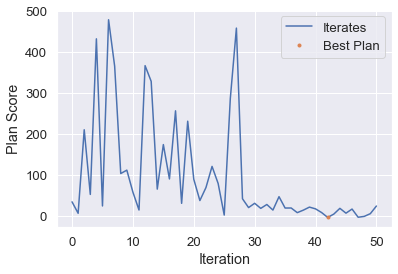

In [80]:
# Optimization
plot_opt(func_vals_quarter0)

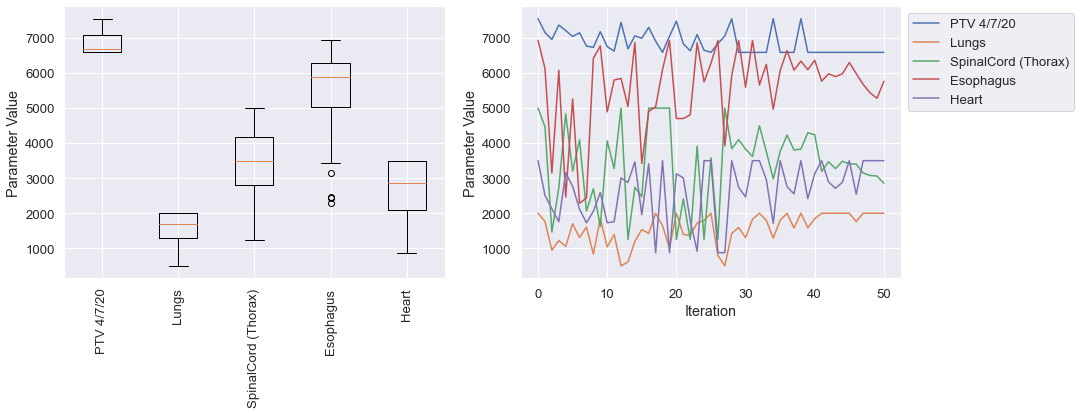

In [82]:
# Parameters
plot_pars(x_iters_quarter0)

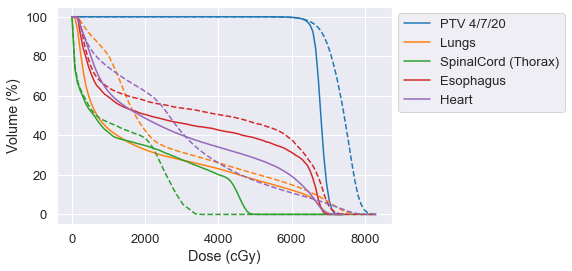

In [83]:
# DVH
plot_dvh(dvh_quarter0)

In [84]:
# Stats
get_stats(fun_quarter0, objs_quarter0)

# Clearly a worse plan, both in terms of score and ROI results
# Only thing that improved was SpinalCord, most other things
# significantly worse.

# Tradeoff is to favor the SpinalCord and the Heart over other ROIs.
# Clearly we need to change objective function shapes so that we prioritize
# the correct organs.

Approved Score: -29.0510, Result Score: -3.854497, % Change: 86.7320
PTV 4/7/20 Approved: 7405.6592, Result: 8317.9131, % Change: 12.3183
Lungs Approved: 1711.2751, Result: 2460.1030, % Change: 43.7585
SpinalCord (Thorax) Approved: 5225.1553, Result: 3611.3213, % Change: -30.8859
Esophagus Approved: 7064.1133, Result: 7567.7769, % Change: 7.1299
Heart Approved: 2830.0539, Result: 2853.8917, % Change: 0.8423


In [85]:
# Quarter paramter range
for roi in roi_list:
    dose = objs_quarter0[roi][-1]['DoseValue']
    res = objs_quarter0[roi][-1]['ResultValue']
    print(f'{roi} Absolute Change: {res - dose}, Relative Change: {100*(res - dose)/dose}')

PTV 4/7/20 Absolute Change: 767.9130859375, Relative Change: 10.171034250827814
Lungs Absolute Change: 460.10303845621047, Relative Change: 23.005151922810523
SpinalCord (Thorax) Absolute Change: -1388.6787109375, Relative Change: -27.77357421875
Esophagus Absolute Change: 637.77685546875, Relative Change: 9.20312922754329
Heart Absolute Change: -646.1083303346045, Relative Change: -18.46023800956013


# Quarter Range (51-100)

In [86]:
fun_quarter1 = np.load('6_16_quarter/second/fun.npy')
func_vals_quarter1 = np.load('6_16_quarter/second/func_vals.npy')
x_quarter1 = np.load('6_16_quarter/second/x.npy')
x_iters_quarter1 = np.load('6_16_quarter/second/x_iters.npy')
stats_quarter1 = np.load('6_16_quarter/second/stats.npy', allow_pickle=True).item()
dvh_quarter1 = np.load('6_16_quarter/second/dvh.npy', allow_pickle=True).item()
objs_quarter1 = np.load('6_16_quarter/second/objs.npy', allow_pickle=True).item()

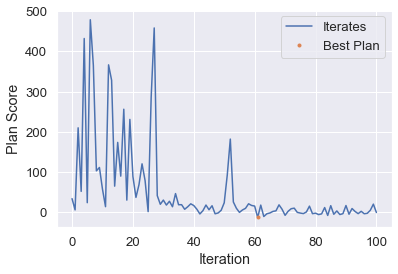

In [89]:
# Optimization
plot_opt(func_vals_quarter1)

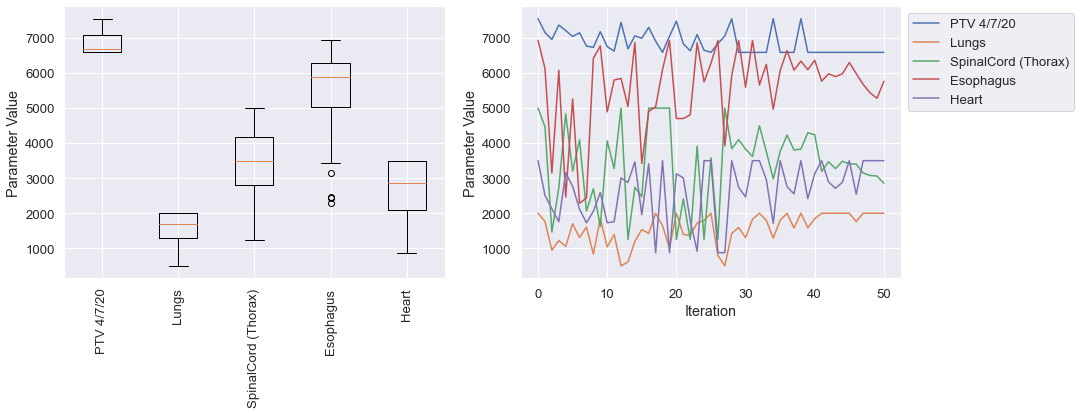

In [90]:
# Parameters
plot_pars(x_iters_quarter0)

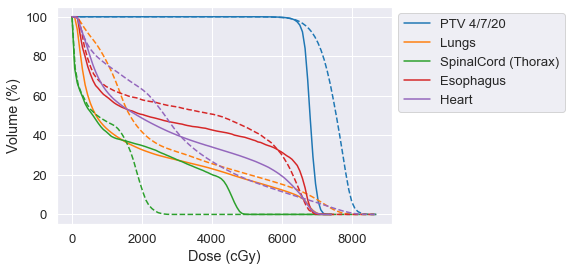

In [95]:
# DVH
plot_dvh(dvh_quarter1)

In [96]:
# Stats
get_stats(fun_quarter1, objs_quarter1)

Approved Score: -29.0510, Result Score: -12.472964, % Change: 57.0653
PTV 4/7/20 Approved: 7405.6592, Result: 8695.5068, % Change: 17.4171
Lungs Approved: 1711.2751, Result: 2507.7940, % Change: 46.5453
SpinalCord (Thorax) Approved: 5225.1553, Result: 2904.7722, % Change: -44.4079
Esophagus Approved: 7064.1133, Result: 7326.7344, % Change: 3.7177
Heart Approved: 2830.0539, Result: 2910.0656, % Change: 2.8272


In [97]:
# Quarter paramter range
for roi in roi_list:
    dose = objs_quarter1[roi][-1]['DoseValue']
    res = objs_quarter1[roi][-1]['ResultValue']
    print(f'{roi} Absolute Change: {res - dose}, Relative Change: {100*(res - dose)/dose}')

PTV 4/7/20 Absolute Change: 1145.5068359375, Relative Change: 15.172275972682119
Lungs Absolute Change: 507.7940415318176, Relative Change: 25.38970207659088
SpinalCord (Thorax) Absolute Change: -2095.227783203125, Relative Change: -41.9045556640625
Esophagus Absolute Change: 396.734375, Relative Change: 5.724882756132756
Heart Absolute Change: -589.9344199486532, Relative Change: -16.85526914139009


# Simple linear quadratic functions

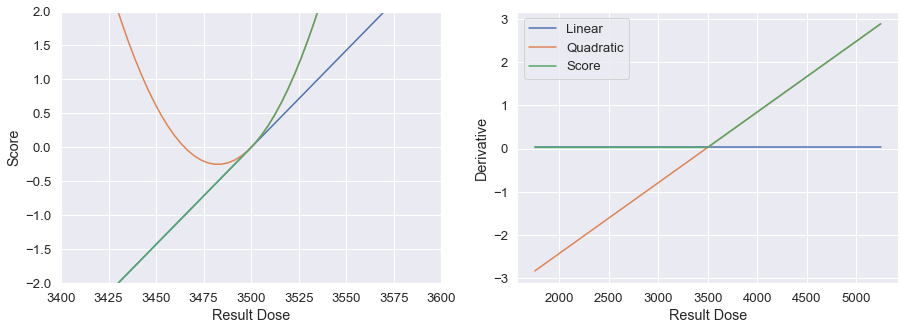

In [250]:
roi = 'Heart'
max_val = objs_approved[roi][-1]['DoseValue']
dx = -max_val/200
dy = -1/4
f = lambda x: 100*(x - max_val)/max_val
fp = lambda x: 100/max_val*np.ones_like(x)
g = lambda x: f(x - dx)**2 + dy
gp = lambda x: 2*f(x - dx)*fp(x - dx + 25)
h = lambda x: (x <= max_val)*f(x) + (x > max_val)*g(x)
hp = lambda x: (x <= max_val)*fp(x) + (x > max_val)*gp(x)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
res_val = np.linspace(0.5*max_val, 1.5*max_val, 1000)
ax[0].plot(res_val, f(res_val))
ax[0].plot(res_val, g(res_val))
ax[0].plot(res_val, h(res_val))
ax[0].set_xlabel('Result Dose')
ax[0].set_ylabel('Score')
ax[0].set_xlim([max_val - 100, max_val + 100])
ax[0].set_ylim([-2, 2])

ax[1].plot(res_val, fp(res_val))
ax[1].plot(res_val, gp(res_val))
ax[1].plot(res_val, hp(res_val))
ax[1].set_xlabel('Result Dose')
ax[1].set_ylabel('Derivative')
plt.legend(['Linear', 'Quadratic', 'Score']);